## Exercício:

### Informações sobre o Dataset
mcg: The McGeoch's method for signal sequence recognition score.

gvh: The von Heijne's method for signal sequence recognition score.

alm: Score of the ALOM membrane spanning region prediction program.

mit: Score for the presence of mitochondria.

erl: Presence of endoplasmic reticulum (ER) lumen protein retaining signal (KDEL or HDEL) at the C-terminus of the protein.

pox: Peroxisomal targeting signal in the C-terminus.

vac: Presence of vacuolar targeting signal in the N-terminus (score).

nuc: Score for the presence of nuclear localization signals (NLSs).

Class: The class label, indicating where the protein is localized. There are 10 classes: CYT (cytosolic or cytoskeletal), NUC (nuclear), MIT (mitochondrial), ME3 (membrane protein, no N-terminal signal), ME2 (membrane protein, uncleaved signal), ME1 (membrane protein, cleaved signal), EXC (extracellular), VAC (vacuolar), POX (peroxisomal), ERL (endoplasmic reticulum lumen).

In [24]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [2]:
yeast = pd.read_csv('yeast.csv')
yeast.head()

,mcg,gvh,alm,mit,erl,pox,vac,nuc,name
0,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22,MIT
1,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22,MIT
2,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22,MIT
3,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22,NUC
4,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22,MIT


In [3]:
yeast.info()
yeast.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1484 entries, 0 to 1483
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mcg     1484 non-null   float64
 1   gvh     1484 non-null   float64
 2   alm     1484 non-null   float64
 3   mit     1484 non-null   float64
 4   erl     1484 non-null   float64
 5   pox     1484 non-null   float64
 6   vac     1484 non-null   float64
 7   nuc     1484 non-null   float64
 8   name    1484 non-null   object 
dtypes: float64(8), object(1)
memory usage: 104.5+ KB


(1484, 9)

In [4]:
yeast.isna().sum()

mcg     0
gvh     0
alm     0
mit     0
erl     0
pox     0
vac     0
nuc     0
name    0
dtype: int64

In [5]:
yeast['name'].value_counts()

name
CYT    463
NUC    429
MIT    244
ME3    163
ME2     51
ME1     44
EXC     35
VAC     30
POX     20
ERL      5
Name: count, dtype: int64

In [6]:
yeast.drop('name', axis=1).describe()

,mcg,gvh,alm,mit,erl,pox,vac,nuc
count,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000,1484.000000
mean,0.500121,0.499933,0.500034,0.261186,0.504717,0.007500,0.499885,0.276199
std,0.137299,0.123924,0.086670,0.137098,0.048351,0.075683,0.057797,0.106491
min,0.110000,0.130000,0.210000,0.000000,0.500000,0.000000,0.000000,0.000000
25%,0.410000,0.420000,0.460000,0.170000,0.500000,0.000000,0.480000,0.220000
50%,0.490000,0.490000,0.510000,0.220000,0.500000,0.000000,0.510000,0.220000
75%,0.580000,0.570000,0.550000,0.320000,0.500000,0.000000,0.530000,0.300000
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.830000,0.730000,1.000000


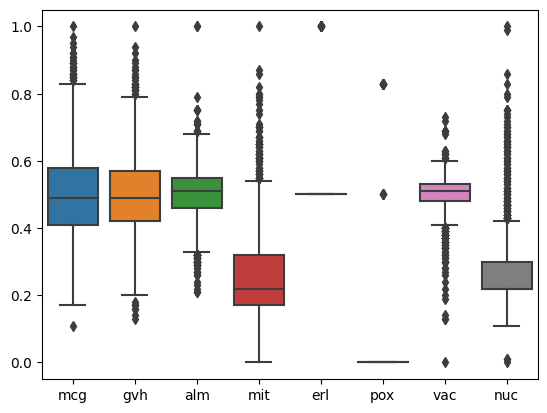

In [7]:
sns.boxplot(data=yeast.drop('name', axis=1));

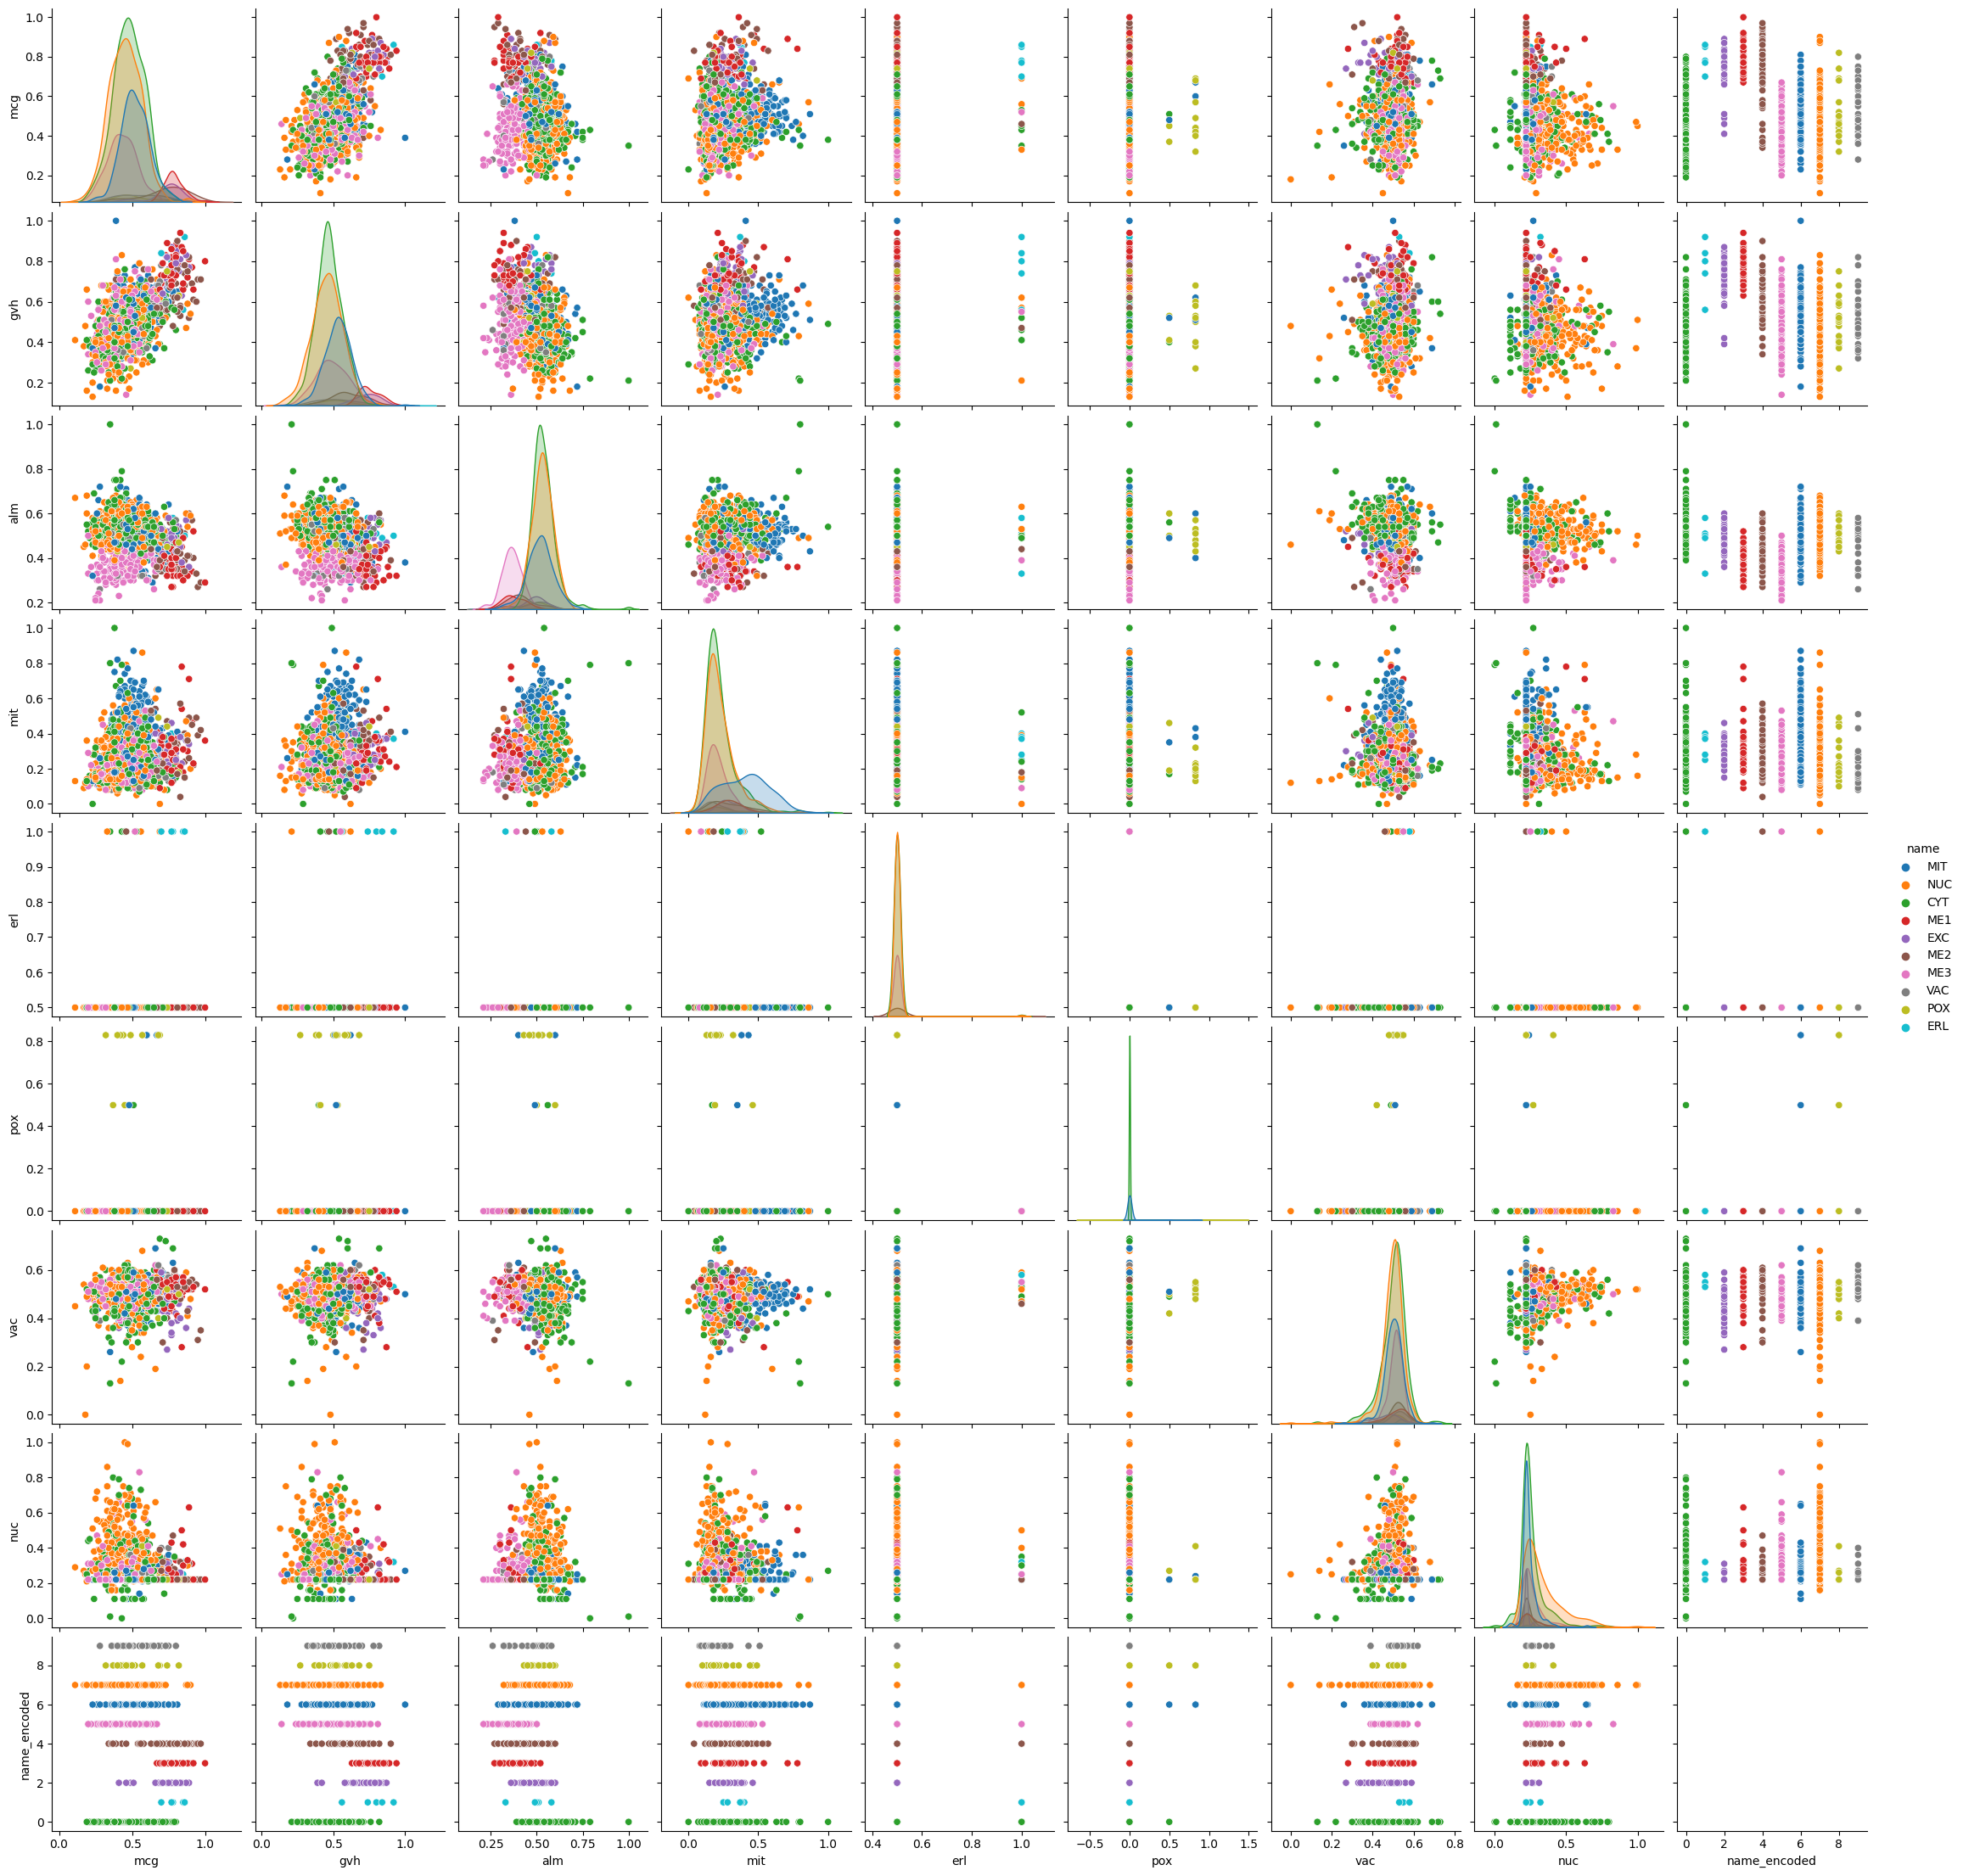

In [13]:
sns.pairplot(data=yeast, hue='name')

Através dos gráficos acima, podemos ver bastante sobreposição na distribuição das features com relação a cada target. Também podemos ver bastante outliers em todas as features, além de desbalanceamento nas categorias do target (entre 463 amostras até 5)

In [8]:
# Separando os dados em treino e teste
X = yeast.drop('name', axis=1)
y = yeast.name

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [9]:
# Criando um código numérico para a target
le = LabelEncoder()
yeast['name_encoded'] = le.fit_transform(yeast['name'])
yeast_le = yeast.drop('name', axis=1)
yeast_le.head()

,mcg,gvh,alm,mit,erl,pox,vac,nuc,name_encoded
0,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22,6
1,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22,6
2,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22,6
3,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22,7
4,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22,6


In [38]:
# Modelo de knn
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

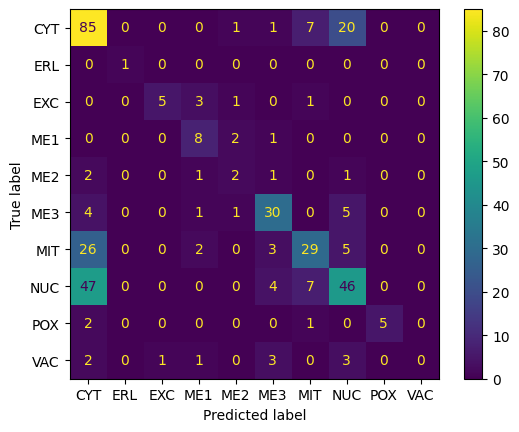

In [39]:
# Predição e matriz de confusão para o modelo gerado
y_pred = knn.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [40]:
# Principais métricas de avaliação do modelo
clas_report = classification_report(y_test, y_pred, zero_division=0, output_dict=True)

report = pd.DataFrame(clas_report)
report

,CYT,ERL,EXC,ME1,ME2,ME3,MIT,NUC,POX,VAC,accuracy,macro avg,weighted avg
precision,0.505952,1.0,0.833333,0.500000,0.285714,0.697674,0.644444,0.575000,1.000000,0.0,0.568733,0.604212,0.573600
recall,0.745614,1.0,0.500000,0.727273,0.285714,0.731707,0.446154,0.442308,0.625000,0.0,0.568733,0.550377,0.568733
f1-score,0.602837,1.0,0.625000,0.592593,0.285714,0.714286,0.527273,0.500000,0.769231,0.0,0.568733,0.561693,0.555806
support,114.000000,1.0,10.000000,11.000000,7.000000,41.000000,65.000000,104.000000,8.000000,10.0,0.568733,371.000000,371.000000


### Considerações:
Análise com Regressão Logística levantou um warning de que era preciso escalar os valores. Ao alterar a análise pra KNN, esse aviso não foi levantado, por isso optei pelo knn.
A matriz de confusão e métricas do report mostraram valores baixos de correta classificação de cada amostra.

- Com o conhecimento que será visto nas próximas aulas, é possível que seja gerado um modelo de predição com métricas melhores, possivelmente testando diferentes algoritmos e hiperparâmetros, além de realizar um melhor pré-processamento dos dados, como lidar com outliers e escalonamento.